In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


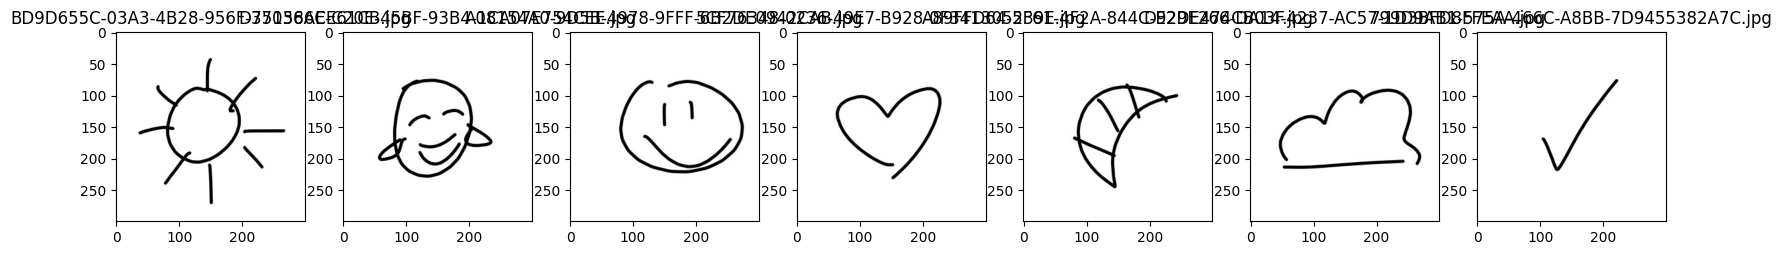

In [2]:
#importing libraries
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
%matplotlib inline

plt.figure(figsize=(20,20))

test_folder = '/content/drive/MyDrive/Handwritten-Captcha-Solver/Emoji_Dataset'
folder = ['sun', 'laugh', 'smile', 'heart', 'croissant', 'cloud', 'checkmark']

for i in range(len(folder)):
    path = os.path.join(test_folder, folder[i])
    file = random.choice(os.listdir(path))
    image_path = os.path.join(path, file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(1, 7, i + 1)
    ax.title.set_text(file)
    plt.imshow(img)

plt.show()


In [3]:
IMG_HEIGHT = 28
IMG_WIDTH = 28

In [4]:
def create_dataset(img_folder):

    img_data_array=[]
    class_name=[]

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):

            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path,cv2.IMREAD_GRAYSCALE)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

img_data, class_name =create_dataset(test_folder)

In [5]:
#converting list to numpy array
img_data = np.array(img_data)

In [6]:
#printing the image
def show(img):
  img = img.reshape(28,28)
  plt.imshow(img , cmap = 'gray')

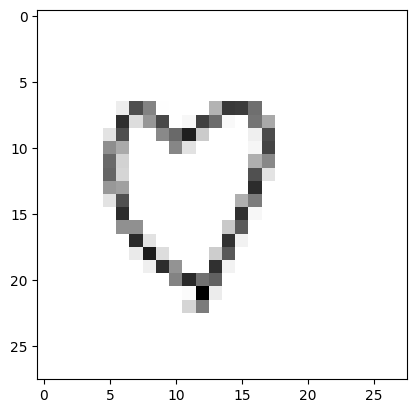

In [7]:
#printing the image obtained from the img_data
plt.imshow(img_data[0],cmap = 'gray')

In [8]:
#converting string class name to integer labels
target_dict={'checkmark':1 , 'cloud':2 , 'croissant':3, 'heart':4, 'laugh':5, 'smile':6 , 'sun':7}
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [9]:
def img_preprocess(img):
  #noise removal
  img_blur = cv2.GaussianBlur(img, (0,0), sigmaX=0.25, sigmaY=0.25)
  #thresholding the image
  img_blur = img_blur.astype('uint8')
  img_thresh = cv2.threshold(img,240, 255, cv2.THRESH_BINARY_INV)

  return img_thresh[1]

In [10]:
img_dataset = img_data.copy()
new_data = []
for img in img_dataset:
  img = img_preprocess(img)
  new_data.append(img)
new_data_1= np.array(new_data)
print(new_data_1.shape)

(354, 28, 28)


In [11]:
from tqdm import tqdm


from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage

final_train_data = []
final_target_train = []

for i in tqdm(range(new_data_1.shape[0])):
    final_train_data.append(new_data_1[i])
    final_train_data.append(rotate(new_data_1[i], angle=45, mode = 'wrap'))
    final_train_data.append(np.fliplr(new_data_1[i]))
    final_train_data.append(random_noise(new_data_1[i],var=0.2**2))

    for j in range(4):
        final_target_train.append(target_val[i])

100%|██████████| 354/354 [00:00<00:00, 3141.81it/s]


In [12]:
len(final_target_train), len(final_train_data)
final_train = np.array(final_train_data)
final_target_train = np.array(final_target_train)

In [13]:
img_data= []
for i in range(final_train.shape[0]):
  img= final_train[i].reshape(784)
  img_data.append(img)
img_dataset = np.array(img_data)

(1416, 784)


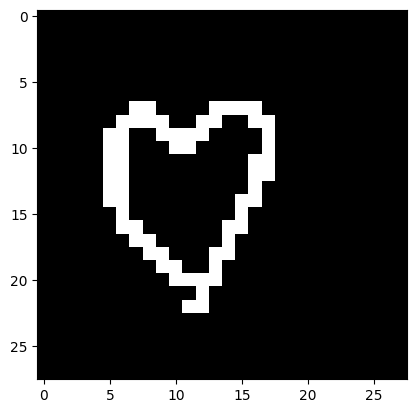

In [14]:
#printing images after processing
print(img_dataset.shape)
show(img_dataset[0,:])

In [15]:
# creating pandas dataframe
df = pd.DataFrame(img_dataset,columns=range(img_dataset.shape[1]))

In [16]:
final_target_train = pd.Series(final_target_train)
# emoji_dataset = pd.concat([target_val,df], ignore_index=True, sort=False,axis = 1)
df['class'] = final_target_train.values

(1416, 785)
Label : 4


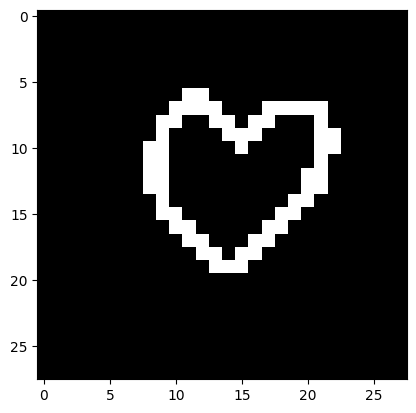

In [17]:
print(df.shape)
#printing an image from the dataframe with its lable
print(f'Label : {df.iloc[200,784]}')
show(np.array(df.iloc[200,0:784]))

In [18]:
#data augmentation
print(df.groupby('class')['class'].count())

class
1    200
2    200
3    200
4    204
5    208
6    204
7    200
Name: class, dtype: int64


## EMNIST Dataset

In [19]:
import pandas as pd
# Read CSV directly from Google Drive
# data = pd.read_csv("/content/drive/MyDrive/Handwritten-Captcha-Solver/emnist-byclass-train.csv")

chunk_size = 1000
data = pd.DataFrame()

chunks = pd.read_csv("/content/drive/MyDrive/Handwritten-Captcha-Solver/emnist-byclass-train.csv", chunksize=chunk_size)

for chunk in chunks:
    data = pd.concat([data, chunk], ignore_index=True)

data.head()


,35,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.466,0.467,0.468,0.469,0.470,0.471,0.472,0.473,0.474,0.475
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data.shape

(697931, 785)

Index(['35', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.466', '0.467', '0.468', '0.469', '0.470', '0.471', '0.472', '0.473',
       '0.474', '0.475'],
      dtype='object', length=785)
35
0     34585
1     38374
2     34203
3     35143
4     33535
      ...  
57     2910
58     2697
59     2822
60     2365
61     2725
Name: 35, Length: 62, dtype: int64
Label : 6


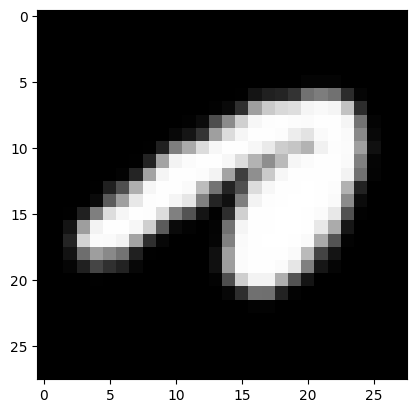

In [21]:
#printing an image from the dataset
print(data.columns)
print(data.groupby('35')['35'].count())
print(f'Label : {data.iloc[1,0]}')
show(np.array(data.iloc[1,1:785]))

In [22]:
def emnist_data_preprocessing(img):
  img=img.reshape(28,28)
  img = img.astype('uint8')
  thresh = cv2.threshold(img,150, 255, cv2.THRESH_BINARY)
  w = 28
  h = 28
  center = (w/2, h/2)
  rotation_mat = cv2.getRotationMatrix2D( center, -90, 1)     #anti-clockwise direction
  img_rotated = cv2.warpAffine(thresh[1], rotation_mat, (w,h))    #warpAffine does appropriate shifting
  image = cv2.flip(img_rotated, 1)
  img_final = image.reshape(784)
  return img_final

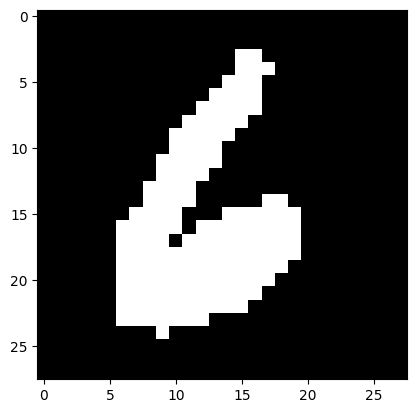

In [23]:
#checking wether our image preprocessing is working or not
img = np.array(data.iloc[1,1:785])
show(img)
img = emnist_data_preprocessing(img)
show(img)

In [24]:
#analyizing the dataset and removing numbers from the dataset
print(data.columns)

Index(['35', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.466', '0.467', '0.468', '0.469', '0.470', '0.471', '0.472', '0.473',
       '0.474', '0.475'],
      dtype='object', length=785)


In [25]:
print(data.groupby('35')['35'].count())

35
0     34585
1     38374
2     34203
3     35143
4     33535
      ...  
57     2910
58     2697
59     2822
60     2365
61     2725
Name: 35, Length: 62, dtype: int64


In [ ]:
#dropping integer class
data
drop_data =[0,1,2,3,4,5,6,7,8,9,18,21,23,24,26,28,30,31,34,35,36,38,39,41,42,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]

for i in drop_data:

  data = data.drop(data[data['35'] == i].index)

In [ ]:
data.shape

In [ ]:
print(data.groupby('35')['35'].count())

In [ ]:
#creating the dataset
emnist_img = []
for i in range(0,data.shape[0]):
  img = data.iloc[i,1:]
  img = img.to_numpy()
  img = emnist_data_preprocessing(img)
  emnist_img.append(img)

In [ ]:
#converting into numpy  array
emnist_img = np.array(emnist_img)
emnist_img.shape

In [ ]:
#printing image from the emnist dataset
show(emnist_img[1][0:784])
print(data.iloc[1,0])

In [ ]:
# creating pandas dataframe
df2 = pd.DataFrame(emnist_img, columns =range(emnist_img.shape[1]) )

In [ ]:
print(df2.shape)
print(data['35'].shape)

In [ ]:
# letter_dataset = pd.concat([data['35']-2,df2], ignore_index=True, sort=False,)
df2['class'] = data['35'].values-2

In [ ]:
print(df2.shape)
df2
print(df2.groupby('class')['class'].count())

In [ ]:
#printing the image after formation of dataframe
print(f'Label : {df2.iloc[2,784]}')
show(np.array(df2.iloc[2,0:784]))

In [ ]:
print(df2.isna().sum())

In [ ]:
type(df2)
print(df2['class'].dtype)
print(df2[0].dtype)

In [ ]:
result = pd.concat([df2,df],ignore_index = True)

In [ ]:
result.shape

In [ ]:
result

In [ ]:

# result = result.dropna()
result.isna().sum()

In [ ]:
result= result.sample(frac=1).reset_index(drop=True)

In [ ]:
print(result.groupby('class')['class'].count())

In [ ]:
result.shape

In [ ]:
result.to_csv('char_dataset.csv' , index = False)